In [15]:
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt

print(torch_geometric.__version__)
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    # plt.xticks([])
    # plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color)
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    # plt.xticks([])
    # plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()



2.4.0


In [8]:
dataset = torch_geometric.datasets.KarateClub()

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data=dataset[0]
features=data.x
labels=data.y
data.view()

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


AttrView(store=Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34]), attr=DataTensorAttr(group_name=None, attr_name=<_FieldStatus.UNSET: None>, index=None))

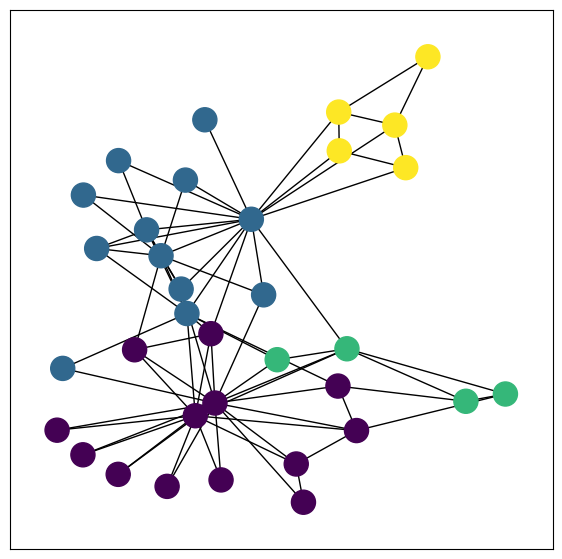

In [16]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True) #by default directed?
visualize_graph(G, color=data.y)